In [29]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [30]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import backend
import numpy

In [31]:
# loading data and doing some data exploration 
data = pd.read_csv('Hospital_Readmissions.csv')
data.head()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_AMI_HRRP,Not Available,1.0,Not Available,Not Available,Not Available,Not Available,7/1/2014,6/30/2017
1,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_CABG_HRRP,Not Available,1.0,Not Available,Not Available,Not Available,Not Available,7/1/2014,6/30/2017
2,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_COPD_HRRP,217,NaN,1.0195,20.9722,20.5712,47,7/1/2014,6/30/2017
3,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HF_HRRP,259,NaN,1.0773,23.9788,22.2578,67,7/1/2014,6/30/2017
4,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HIP_KNEE_HRRP,Not Available,1.0,Not Available,Not Available,Not Available,Not Available,7/1/2014,6/30/2017


In [32]:
# checking the dataset shape
data.shape

(19674, 12)

In [33]:
# checking the data type 
data.dtypes

Facility Name                  object
Facility ID                     int64
State                          object
Measure Name                   object
Number of Discharges           object
Footnote                      float64
Excess Readmission Ratio       object
Predicted Readmission Rate     object
Expected Readmission Rate      object
Number of Readmissions         object
Start Date                     object
End Date                       object
dtype: object

In [34]:
# checking for missing data
# missing values are respesented as 'not available'
for col in data.columns:
    if data[col].dtype == object:
        print(col, data[col][data[col] == 'Not Available'].count())

Facility Name 0
State 0
Measure Name 0
Number of Discharges 8019
Excess Readmission Ratio 5394
Predicted Readmission Rate 5394
Expected Readmission Rate 5394
Number of Readmissions 8142
Start Date 0
End Date 0


In [35]:
# dropping missing values
import numpy
# marking 'not available' as NaN
data[['Number of Discharges','Excess Readmission Ratio','Predicted Readmission Rate',
      'Expected Readmission Rate','Number of Readmissions']] = data[['Number of Discharges','Excess Readmission Ratio','Predicted Readmission Rate',
      'Expected Readmission Rate','Number of Readmissions']].replace('Not Available', numpy.NaN)
data.head()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_AMI_HRRP,NaN,1.0,NaN,NaN,NaN,NaN,7/1/2014,6/30/2017
1,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_CABG_HRRP,NaN,1.0,NaN,NaN,NaN,NaN,7/1/2014,6/30/2017
2,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_COPD_HRRP,217,NaN,1.0195,20.9722,20.5712,47,7/1/2014,6/30/2017
3,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HF_HRRP,259,NaN,1.0773,23.9788,22.2578,67,7/1/2014,6/30/2017
4,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HIP_KNEE_HRRP,NaN,1.0,NaN,NaN,NaN,NaN,7/1/2014,6/30/2017


* After converting the missing values (not available) to NaN the next step was to remove missing values from the dataset as shown below

In [36]:
# first check for missing values
data.isna().sum()

Facility Name                     0
Facility ID                       0
State                             0
Measure Name                      0
Number of Discharges           8019
Footnote                      11517
Excess Readmission Ratio       5394
Predicted Readmission Rate     5394
Expected Readmission Rate      5394
Number of Readmissions         8142
Start Date                        0
End Date                          0
dtype: int64

In [37]:
# removing missing values and checking the confirming the test was successful
data = data.dropna()
data.shape

(15, 12)

In [38]:
data.head()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
11106,UNIVERSITY OF MARYLAND MEDICAL CENTER,210002,MD,READM_30_AMI_HRRP,415,23.0,0.9837,17.3611,17.6488,71,7/1/2014,6/30/2017
11107,UNIVERSITY OF MARYLAND MEDICAL CENTER,210002,MD,READM_30_CABG_HRRP,309,23.0,0.9758,14.1241,14.475,43,7/1/2014,6/30/2017
11108,UNIVERSITY OF MARYLAND MEDICAL CENTER,210002,MD,READM_30_COPD_HRRP,175,23.0,0.9475,21.2781,22.4579,33,7/1/2014,6/30/2017
11109,UNIVERSITY OF MARYLAND MEDICAL CENTER,210002,MD,READM_30_HF_HRRP,415,23.0,1.0461,24.5747,23.4918,105,7/1/2014,6/30/2017
11111,UNIVERSITY OF MARYLAND MEDICAL CENTER,210002,MD,READM_30_PN_HRRP,250,23.0,1.0443,20.5103,19.6405,54,7/1/2014,6/30/2017


* In the following steps I removed some of the columns that I felt would not play part in the analysis using the steps below.

In [40]:
data_modified = data.drop(['Facility Name','Facility ID', 'Measure Name','State','Start Date', 'End Date'], axis = 1)
data_modified.head()

,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
11106,415,23.0,0.9837,17.3611,17.6488,71
11107,309,23.0,0.9758,14.1241,14.475,43
11108,175,23.0,0.9475,21.2781,22.4579,33
11109,415,23.0,1.0461,24.5747,23.4918,105
11111,250,23.0,1.0443,20.5103,19.6405,54


Now that I have the data of interest for the analysis, next step was to spit the data into y targets and remove the target data from the dataset. I this case I am predicting readmission numbers; hence, I will remove the number of readmission from the dataset and train the dataset to predict the number of readmissions.

In [41]:
y = data_modified['Number of Readmissions']
data_modified = data_modified.drop(['Number of Readmissions'], axis = 1)
print(y.head())
print(data_modified.head())

11106     71
11107     43
11108     33
11109    105
11111     54
Name: Number of Readmissions, dtype: object
      Number of Discharges  Footnote Excess Readmission Ratio  \
11106                  415      23.0                   0.9837   
11107                  309      23.0                   0.9758   
11108                  175      23.0                   0.9475   
11109                  415      23.0                   1.0461   
11111                  250      23.0                   1.0443   

      Predicted Readmission Rate Expected Readmission Rate  
11106                    17.3611                   17.6488  
11107                    14.1241                    14.475  
11108                    21.2781                   22.4579  
11109                    24.5747                   23.4918  
11111                    20.5103                   19.6405  


* The next step was to split the dataset into training and test data(x_train, x_test, y_train, and y_test). I am using 80% training and 20% for the dataset. After splitting the dataset the next step was to normalize the data.

In [42]:
# splittin the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data_modified, y, test_size = 0.2, random_state = 42)

* after creating normalizing the dataset, the next step was to create the neural network model to be used in the prediction

In [51]:
# building a sequential neural network
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (x_train.shape[1],)))
model.add(layers.Dense(62, activation = 'relu'))
model.add(layers.Dense(1))

In [52]:
# next step was to compile the dataset
model.compile(optimizer = 'adam', loss  = 'mse', metrics=['mae'])

In [56]:
# this next step is to fit the dataset using 1000 epochs
history = model.fit(x_train,
                   y_train,
                   epochs = 500,
                   batch_size=100,
                   validation_split=0.2,
                   verbose = 0)
hist = pd.DataFrame(history.history)
print(hist.tail())

      val_loss   val_mae       loss       mae
495  77.833199  7.748985  11.897402  2.967342
496  77.775932  7.746447  11.894379  2.967342
497  77.775574  7.746674  11.891315  2.966644
498  77.760307  7.746165  11.888317  2.966351
499  77.721672  7.744537  11.885366  2.965954


*With the epochs already established, the next step was to plot the loss and MAE vs epochs as below

In [59]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
epochs = range(1, len(history_dict['mae']) + 1)

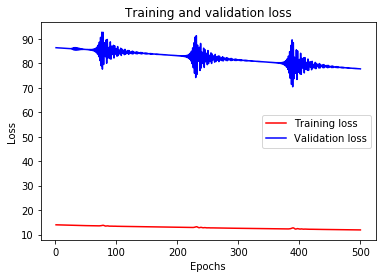

In [60]:
# validation vs training loss epochs
plt.plot(epochs, loss_values, 'r', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [61]:
# evaluating the model performance 
results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

3/3 [==============================] - 0s 333us/step
['loss', 'mae']
[51.8372802734375, 6.9597320556640625]
